In [1]:
#Let's Start Another Project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sample_submission = pd.read_csv(r'C:\Users\omarf\Downloads\playground-series-s5e6\sample_submission.csv')
sample_submission.head()


,id,Fertilizer Name
0,750000,14-35-14 10-26-26 Urea
1,750001,14-35-14 10-26-26 Urea
2,750002,14-35-14 10-26-26 Urea
3,750003,14-35-14 10-26-26 Urea
4,750004,14-35-14 10-26-26 Urea


In [10]:
train = pd.read_csv(r'C:\Users\omarf\Downloads\playground-series-s5e6\train.csv')
train.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Temparature      750000 non-null  int64 
 2   Humidity         750000 non-null  int64 
 3   Moisture         750000 non-null  int64 
 4   Soil Type        750000 non-null  object
 5   Crop Type        750000 non-null  object
 6   Nitrogen         750000 non-null  int64 
 7   Potassium        750000 non-null  int64 
 8   Phosphorous      750000 non-null  int64 
 9   Fertilizer Name  750000 non-null  object
dtypes: int64(7), object(3)
memory usage: 57.2+ MB


In [6]:
train.isnull().sum()

id                 0
Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

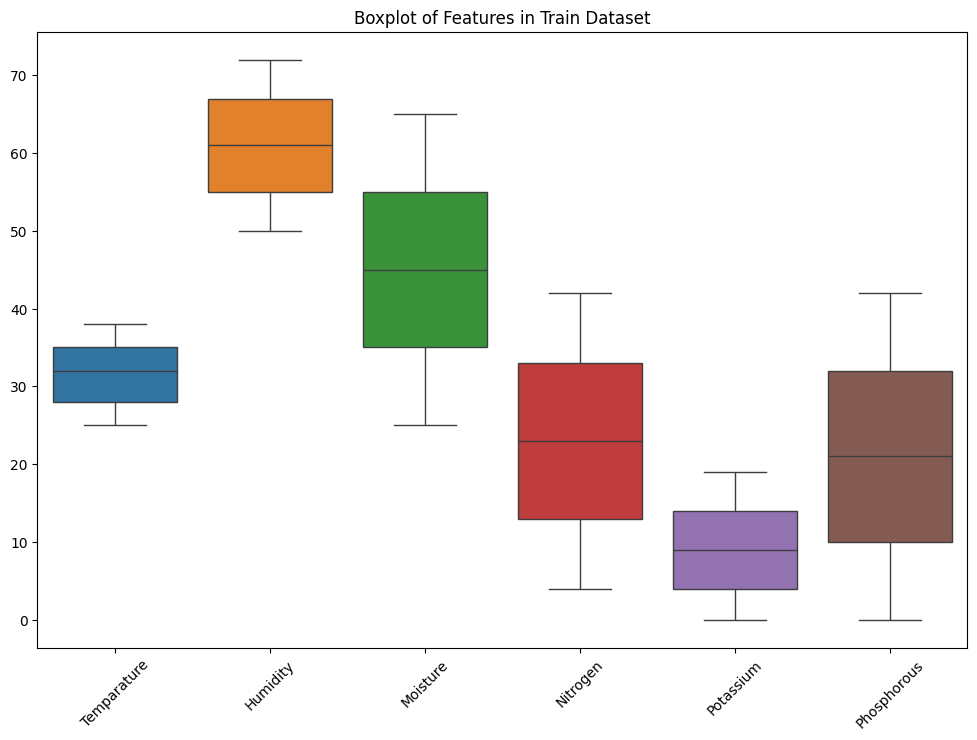

In [8]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=train.drop(columns=['id', 'Fertilizer Name']))
plt.title('Boxplot of Features in Train Dataset')
plt.xticks(rotation=45)
plt.show()

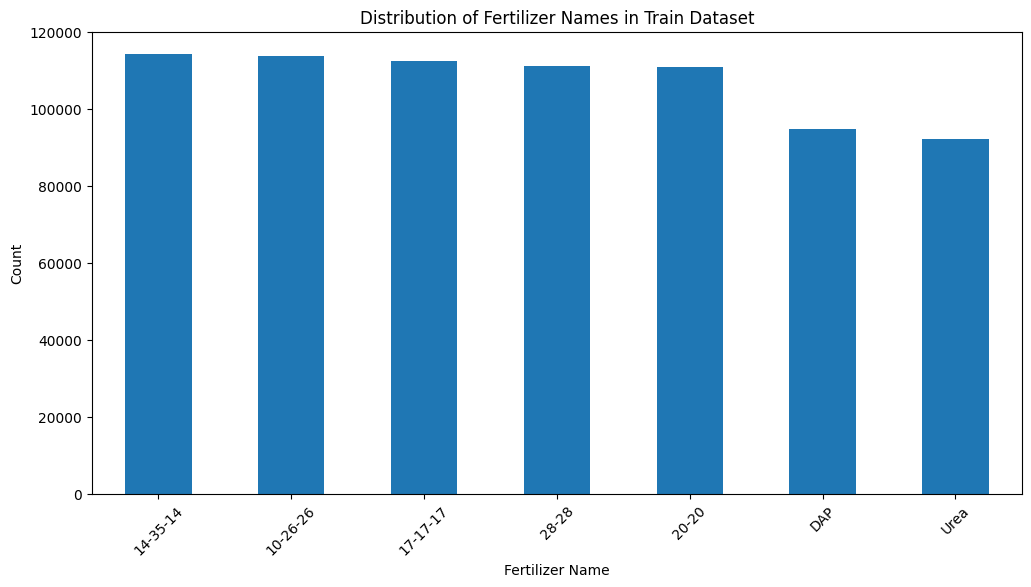

In [11]:
train['Fertilizer Name'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.title('Distribution of Fertilizer Names in Train Dataset')  
plt.xlabel('Fertilizer Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

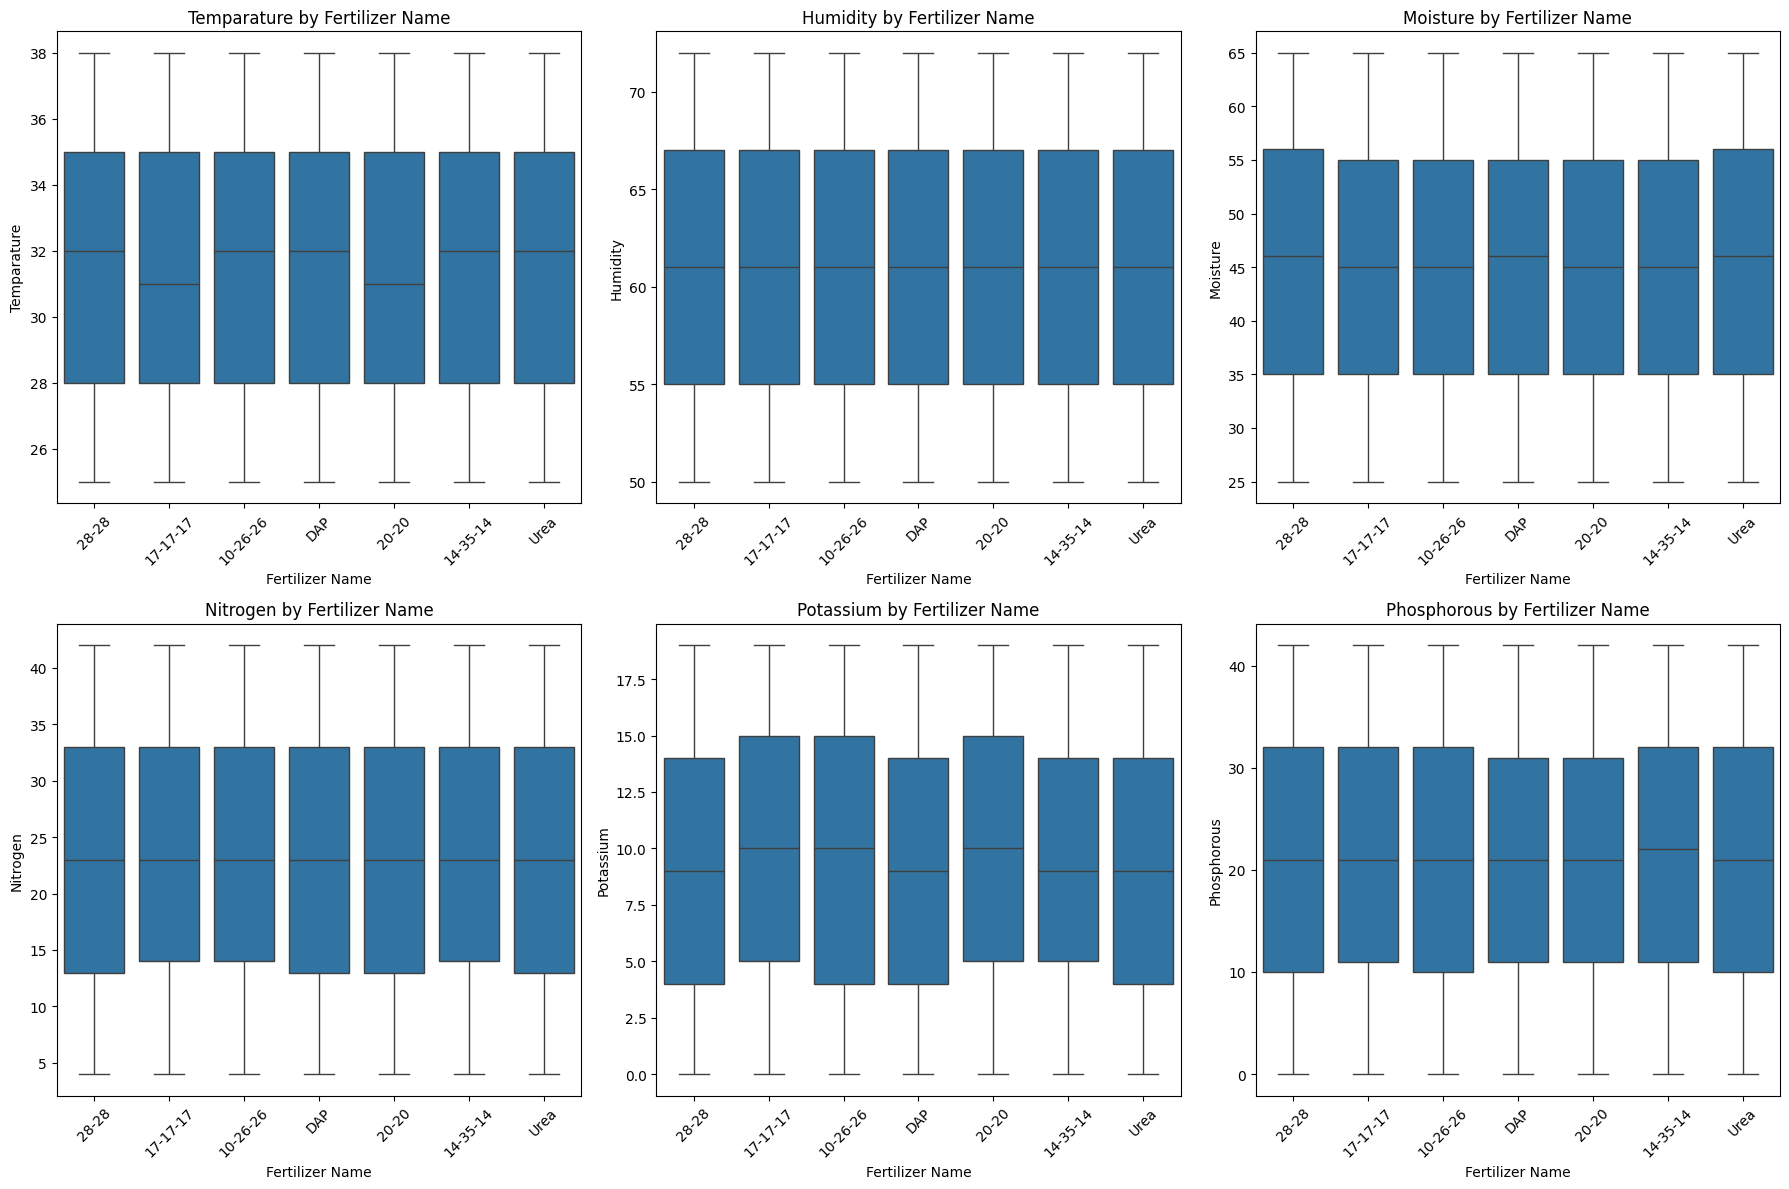

In [12]:
numerical_features = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']

plt.figure(figsize=(18, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Fertilizer Name', y=feature, data=train)
    plt.xticks(rotation=45)
    plt.title(f'{feature} by Fertilizer Name')
plt.tight_layout()
plt.show()

In [13]:
# Feature Engineering on train dataset

# 1. Encode categorical variables
train_fe = train.copy()
train_fe['Soil Type'] = train_fe['Soil Type'].astype('category').cat.codes
train_fe['Crop Type'] = train_fe['Crop Type'].astype('category').cat.codes
train_fe['Fertilizer Name'] = train_fe['Fertilizer Name'].astype('category').cat.codes

# 2. Create interaction features
train_fe['N_P_ratio'] = train_fe['Nitrogen'] / (train_fe['Phosphorous'] + 1)
train_fe['N_K_ratio'] = train_fe['Nitrogen'] / (train_fe['Potassium'] + 1)
train_fe['K_P_ratio'] = train_fe['Potassium'] / (train_fe['Phosphorous'] + 1)

# 3. Aggregate features
train_fe['NPK_sum'] = train_fe['Nitrogen'] + train_fe['Potassium'] + train_fe['Phosphorous']
train_fe['NPK_mean'] = train_fe[['Nitrogen', 'Potassium', 'Phosphorous']].mean(axis=1)

# 4. Polynomial features (squared terms)
train_fe['Temparature_sq'] = train_fe['Temparature'] ** 2
train_fe['Humidity_sq'] = train_fe['Humidity'] ** 2
train_fe['Moisture_sq'] = train_fe['Moisture'] ** 2

# 5. Binning features (optional, for tree models)
train_fe['Temp_bin'] = pd.cut(train_fe['Temparature'], bins=5, labels=False)
train_fe['Humidity_bin'] = pd.cut(train_fe['Humidity'], bins=5, labels=False)

# train_fe now contains engineered features for ML algorithms
train_fe.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,N_P_ratio,N_K_ratio,K_P_ratio,NPK_sum,NPK_mean,Temparature_sq,Humidity_sq,Moisture_sq,Temp_bin,Humidity_bin
0,0,37,70,36,1,8,36,4,5,4,6.000000,7.200000,0.666667,45,15.000000,1369,4900,1296,4,4
1,1,27,69,65,4,4,30,6,18,4,1.578947,4.285714,0.315789,54,18.000000,729,4761,4225,0,4
2,2,29,63,32,4,4,24,12,16,2,1.411765,1.846154,0.705882,52,17.333333,841,3969,1024,1,2
3,3,35,62,54,4,0,39,12,4,0,7.800000,3.000000,2.400000,55,18.333333,1225,3844,2916,3,2
4,4,35,58,43,3,6,37,2,16,5,2.176471,12.333333,0.117647,55,18.333333,1225,3364,1849,3,1


In [17]:
from sklearn.model_selection import train_test_split
X = train_fe.drop(columns=['id', 'Fertilizer Name', 'Crop Type', 'Soil Type'])
y = train_fe['Fertilizer Name']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3.856595550251448


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import average_precision_score

# Prepare features and target
X_lr = train_fe.drop(columns=['id', 'Fertilizer Name', 'Crop Type', 'Soil Type'])
y_lr = train_fe['Fertilizer Name']

# Train/validation split
X_train_lr, X_val_lr, y_train_lr, y_val_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

# Fit Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train_lr)

# Predict and convert to integer class labels
y_pred_lr = lr_model.predict(X_val_lr)
y_pred_lr_class = np.round(y_pred_lr).astype(int)

# One-hot encode true and predicted labels for MAP calculation
n_classes = y_lr.nunique()
y_val_lr_oh = np.eye(n_classes)[y_val_lr]
y_pred_lr_oh = np.eye(n_classes)[np.clip(y_pred_lr_class, 0, n_classes-1)]

# Compute mean average precision
map_score = average_precision_score(y_val_lr_oh, y_pred_lr_oh, average='macro')
print(f"Linear Regression Mean Average Precision: {map_score:.5f}")

Linear Regression Mean Average Precision: 0.14286


In [19]:
# Generate predictions for the test set using the trained model
# Use the same features as in X_train
test_fe = test.copy()
test_fe['Soil Type'] = test_fe['Soil Type'].astype('category').cat.codes
test_fe['Crop Type'] = test_fe['Crop Type'].astype('category').cat.codes

# Create the same engineered features as in train_fe
test_fe['N_P_ratio'] = test_fe['Nitrogen'] / (test_fe['Phosphorous'] + 1)
test_fe['N_K_ratio'] = test_fe['Nitrogen'] / (test_fe['Potassium'] + 1)
test_fe['K_P_ratio'] = test_fe['Potassium'] / (test_fe['Phosphorous'] + 1)
test_fe['NPK_sum'] = test_fe['Nitrogen'] + test_fe['Potassium'] + test_fe['Phosphorous']
test_fe['NPK_mean'] = test_fe[['Nitrogen', 'Potassium', 'Phosphorous']].mean(axis=1)
test_fe['Temparature_sq'] = test_fe['Temparature'] ** 2
test_fe['Humidity_sq'] = test_fe['Humidity'] ** 2
test_fe['Moisture_sq'] = test_fe['Moisture'] ** 2
test_fe['Temp_bin'] = pd.cut(test_fe['Temparature'], bins=5, labels=False)
test_fe['Humidity_bin'] = pd.cut(test_fe['Humidity'], bins=5, labels=False)

# Select the same columns as X_train
test_X = test_fe[X_train.columns]

# Predict using the trained model (e.g., LinearRegression)
test_pred = np.round(model.predict(test_X)).astype(int)

# Map encoded fertilizer names back to original labels
fertilizer_mapping = dict(enumerate(train['Fertilizer Name'].astype('category').cat.categories))
test_pred_labels = pd.Series(test_pred).map(fertilizer_mapping)

# Prepare submission DataFrame
submission = pd.DataFrame({
    'id': test['id'],
    'Fertilizer Name': test_pred_labels
})

# Save to CSV
submission.to_csv('submission.csv', index=False)
submission.head()

,id,Fertilizer Name
0,750000,20-20
1,750001,20-20
2,750002,20-20
3,750003,20-20
4,750004,20-20


In [20]:
from IPython.display import FileLink

# Save the DataFrame to CSV
submission.to_csv('submission.csv', index=False)

# Display a download link
FileLink('submission.csv')

c:\Users\omarf\OneDrive\Documents\submission.csv

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import average_precision_score

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=10)
dt.fit(X_train, y_train)

# Predict probabilities for validation set
dt_probs = dt.predict_proba(X_val)

# One-hot encode true labels for MAP calculation
y_val_oh = np.eye(n_classes)[y_val]

# Compute mean average precision
dt_map = average_precision_score(y_val_oh, dt_probs, average='macro')
print(f"Decision Tree Mean Average Precision: {dt_map:.5f}")

# You can further tune hyperparameters (max_depth, min_samples_split, etc.) for better performance.

Decision Tree Mean Average Precision: 0.14997


In [22]:
from IPython.display import FileLink

# Predict on test set using the trained Decision Tree model
dt_test_pred = dt.predict(test_X)

# Map encoded fertilizer names back to original labels
dt_test_pred_labels = pd.Series(dt_test_pred).map(fertilizer_mapping)

# Prepare submission DataFrame
dt_submission = pd.DataFrame({
    'id': test['id'],
    'Fertilizer Name': dt_test_pred_labels
})

# Save to CSV
dt_submission.to_csv('submission_dt.csv', index=False)

# Display a download link
FileLink('submission_dt.csv')

c:\Users\omarf\OneDrive\Documents\submission_dt.csv

In [23]:
from sklearn.model_selection import GridSearchCV
from IPython.display import FileLink

# Define parameter grid for DecisionTreeClassifier
param_grid = {
    'max_depth': [8, 10, 12, 15],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [1, 2, 5]
}

# Grid search with cross-validation
dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    scoring='average_precision',
    cv=3,
    n_jobs=-1,
    verbose=2
)
dt_grid.fit(X_train, y_train)

print("Best parameters:", dt_grid.best_params_)
print("Best CV score:", dt_grid.best_score_)

# Retrain with best parameters on full training set
best_dt = DecisionTreeClassifier(**dt_grid.best_params_, random_state=42)
best_dt.fit(X_train, y_train)

# Predict on validation set
best_dt_probs = best_dt.predict_proba(X_val)
best_dt_map = average_precision_score(y_val_oh, best_dt_probs, average='macro')
print(f"Tuned Decision Tree Mean Average Precision: {best_dt_map:.5f}")

# Predict on test set
best_dt_test_pred = best_dt.predict(test_X)
best_dt_test_pred_labels = pd.Series(best_dt_test_pred).map(fertilizer_mapping)

# Prepare submission DataFrame
best_dt_submission = pd.DataFrame({
    'id': test['id'],
    'Fertilizer Name': best_dt_test_pred_labels
})
best_dt_submission.to_csv('submission_dt_tuned.csv', index=False)

FileLink('submission_dt_tuned.csv')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best CV score: 0.14957813518042748
Tuned Decision Tree Mean Average Precision: 0.15058


c:\Users\omarf\OneDrive\Documents\submission_dt_tuned.csv